<a href="https://colab.research.google.com/github/chaiminwoo0223/Machine-Learning/blob/main/20_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMDB 리뷰 데이터셋 불러오기
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

In [2]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(25000,) (25000,)
(25000,) (25000,)


In [3]:
print(len(train_input[0]), len(train_input[1]))

218 189


In [4]:
# 리뷰에 따라 텍스트 길이가 모두 달라 파이썬 리스트를 원소로 하여 저장
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
# IMDB 데이터는 정수로 변환되어 있으며, 어휘 사전에 없는 단어는 모두 2로 변환
print(train_input[:20])

[list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 

In [6]:
# 0(부정)과 1(긍정)으로 구분
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
# 훈련 세트와 검증 세트로 분할(8:2)
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [8]:
# 훈련 세트 내 각 리뷰(시퀀스)의 길이
import numpy as np
lengths = np.array([len(x) for x in train_input])
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


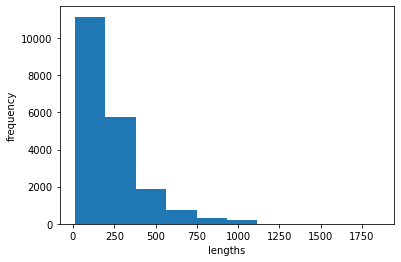

In [10]:
# 히스트그램 시각화(리뷰의 길이 데이터)
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [11]:
# 리뷰를 순회하면서, 길이가 100이 되도록 잘라내거나 0으로 패딩(전처리)
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

In [12]:
print(train_seq.shape)

(20000, 100)


In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
print(train_seq[0][-10:])

[  6   2  46   7  14  20  10  10 470 158]


In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
# 원-핫 인코딩
from tensorflow import keras
train_oh = keras.utils.to_categorical(train_seq)

In [17]:
print(train_oh.shape)

(20000, 100, 500)


In [18]:
print(train_oh[0][0][:12]) # 10

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [19]:
val_seq = pad_sequences(val_input, maxlen = 100)
val_oh = keras.utils.to_categorical(val_seq)

In [20]:
# 순환 신경망 모델 생성하기
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [22]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 48ms/step - loss: 0.6988 - accuracy: 0.5069 - val_loss: 0.6962 - val_accuracy: 0.5150
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6930 - accuracy: 0.5206 - val_loss: 0.6907 - val_accuracy: 0.5296
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6859 - accuracy: 0.5531 - val_loss: 0.6823 - val_accuracy: 0.5622
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6772 - accuracy: 0.5832 - val_loss: 0.6748 - val_accuracy: 0.5876
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6678 - accuracy: 0.6155 - val_loss: 0.6655 - val_accuracy: 0.6186
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6581 - accuracy: 0.6385 - val_loss: 0.6560 - val_accuracy: 0.6390
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6465 - accuracy: 0.6640 - val_loss: 0.6443 - val_ac

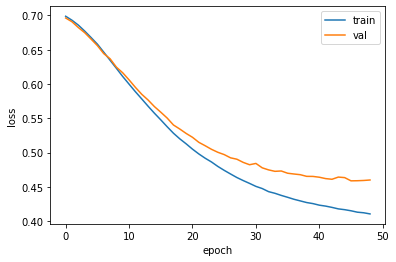

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [24]:
# 순환 신경망 모델 생성하기(단어 임베딩)
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6936 - accuracy: 0.5124 - val_loss: 0.6941 - val_accuracy: 0.5068
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6902 - accuracy: 0.5328 - val_loss: 0.6920 - val_accuracy: 0.5180
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6873 - accuracy: 0.5473 - val_loss: 0.6904 - val_accuracy: 0.5300
Epoch 4/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6837 - accuracy: 0.5613 - val_loss: 0.6884 - val_accuracy: 0.5394
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6719 - accuracy: 0.6094 - val_loss: 0.6662 - val_accuracy: 0.6310
Epoch 6/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6465 - accuracy: 0.6733 - val_loss: 0.6399 - val_accuracy: 0.6754
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6152 - accuracy: 0.7100 - val_loss: 0.6114 - val_accuracy:

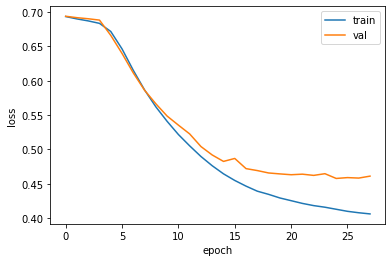

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()